# Task - 02

## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data

### Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load DataSet

In [16]:
Data =pd.read_csv(r"E:\projectprodigy\second task\train.csv",index_col="PassengerId")
Data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [17]:
Data.shape

(891, 11)

In [18]:
Data.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)

In [19]:
Data.size

9801

In [20]:
Data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Data Cleaning and Initial Exploration

In [42]:
# ccheck for missing values
missing_data= Data.isnull().sum()
missing_data

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
# "DataFrame Cleaned: Removed 'Cabin' Column and Filtered Out Rows with Missing 'Embarked' Values"
data = Data.drop(columns="Cabin").dropna(subset=["Embarked"])
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [44]:
# Describe the dataset
data.describe

<bound method NDFrame.describe of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William

In [33]:
# Creating a fun to check the unique values in the feasible columns
def unique_values(data,col):
    x= data[col].value_counts()
    unique_value = data[col].nunique()
    print(f'number of unique values for "{col}" is {unique_value}.')
    print(f'value_counts of"{col}" are:\n{x}')
    print("\n")

In [34]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [39]:
# creating the new dataframe on which i directly apply the unique_values function using the loop
new_data = data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
new_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
PassengerId,,,,,,
1,0,3,male,1,0,S
2,1,1,female,1,0,C
3,1,3,female,0,0,S
4,1,1,female,1,0,S
5,0,3,male,0,0,S


In [40]:
for i in new_data:
    unique_values(new_data,i)

number of unique values for "Survived" is 2.
value_counts of"Survived" are:
Survived
0    549
1    340
Name: count, dtype: int64


number of unique values for "Pclass" is 3.
value_counts of"Pclass" are:
Pclass
3    491
1    214
2    184
Name: count, dtype: int64


number of unique values for "Sex" is 2.
value_counts of"Sex" are:
Sex
male      577
female    312
Name: count, dtype: int64


number of unique values for "SibSp" is 7.
value_counts of"SibSp" are:
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


number of unique values for "Parch" is 7.
value_counts of"Parch" are:
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


number of unique values for "Embarked" is 3.
value_counts of"Embarked" are:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64




### Filling the missing values in the Age column

In [41]:
avg_age= data.groupby("Pclass")["Age"].mean()
avg_age

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [48]:
data.groupby("Survived")["Age"].mean()

Survived
Not Survived    30.626179
Survived        28.193299
Name: Age, dtype: float64

In [49]:
agenull= data[data["Age"].isnull()].groupby("Pclass").size()
agenull   #calculated the null value_count in each class

Pclass
Lower     136
Middle     11
Upper      30
dtype: int64

In [50]:
avg_age = data.groupby('Pclass')['Age'].mean()
def fill_age(row):
    if pd.isnull(row['Age']):
        return avg_age[row['Pclass']]
    else:
        return row['Age']

data['Age'] = data.apply(fill_age, axis=1)
data['Age'].isnull().sum()



0

### Feature Engineering

In [51]:
data['Survived'] = data['Survived'].replace({0: 'Not Survived', 1: 'Survived'})
data['Pclass'] = data['Pclass'].replace({3: 'Lower', 2: 'Middle', 1: 'Upper'})
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,Not Survived,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,Survived,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,Survived,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,Survived,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,Not Survived,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Data Visualization

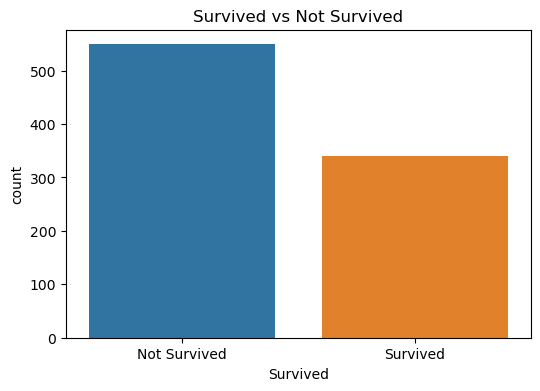

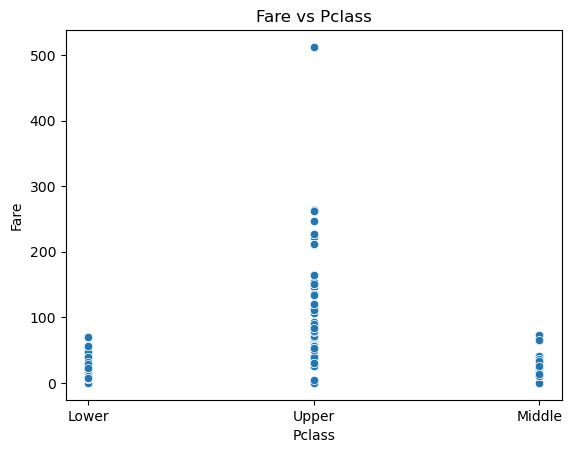

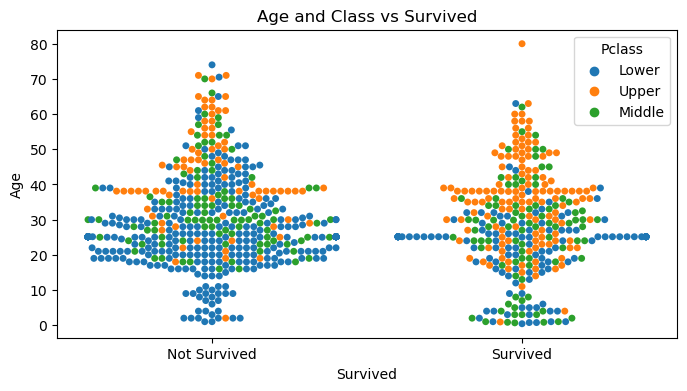

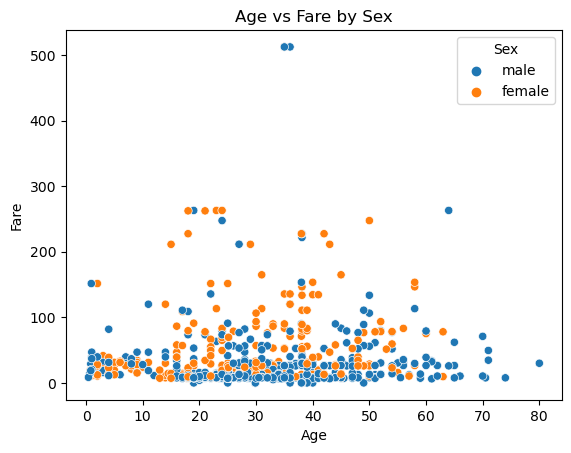

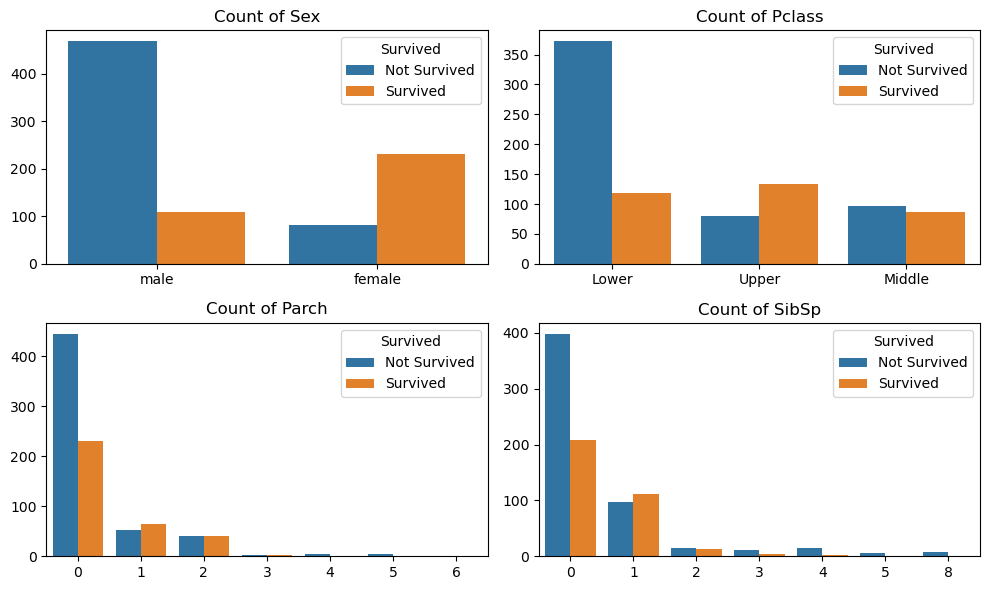

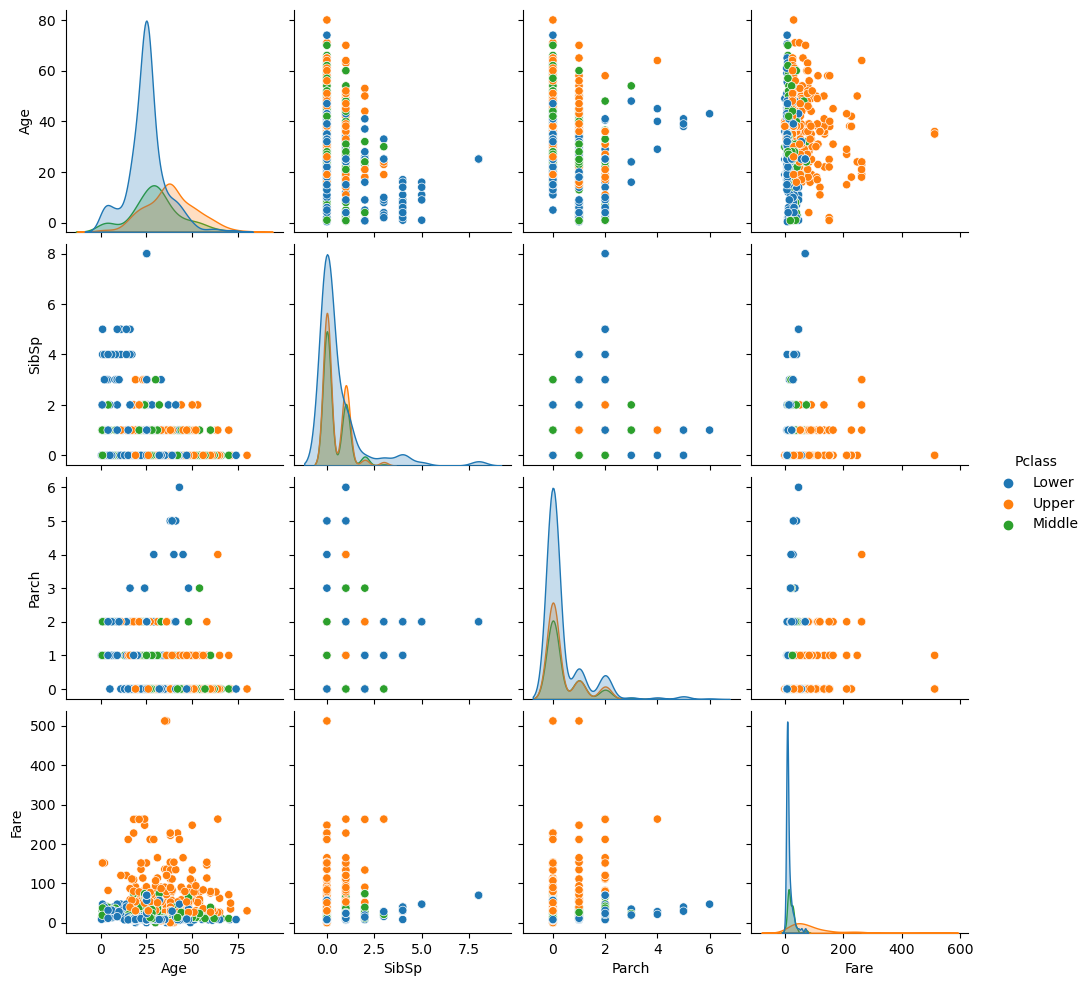

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Survived')
plt.title('Survived vs Not Survived')
plt.show()

sns.scatterplot(data=data, x='Pclass', y='Fare')
plt.title('Fare vs Pclass')
plt.show()

plt.figure(figsize=(8, 4))
sns.swarmplot(data=data, x='Survived', y='Age', hue='Pclass')
plt.title('Age and Class vs Survived')
plt.show()

sns.scatterplot(x=data['Age'], y=data['Fare'], hue=data['Sex'])
plt.title('Age vs Fare by Sex')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']
for feature, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=data, x=feature, hue='Survived', ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

sns.pairplot(data, hue='Pclass')
plt.show()


# Thankyou